1) Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. .

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que esté en esa carpeta desde el comienzo del examen.

4) El examen resuelto debe quedar en este único archivo. No se puede usar un archivo para cada pregunta.

5) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 


CALIFICACIÓN:


In [1]:
3+2+3

8

COMENTARIOS:

1)Ej3 : no respondes acerca de una de las preguntas de la última parte.

2)Ej 2 : creo que el error está en la línea 
aprox = pow(2, i)**log(x) 
que debería ser 
aprox = pow(2, i)*x

## Ejercicio 1

(3 puntos) Podemos estimar el valor de $\alpha(x):=\sqrt{1+x}$ como $\beta(x):=1+(x/2)$ cuando $x$ es,  en valor absoluto,  suficientement próximo a cero. Consideramos que la estimación *es aceptable* cuando  el error relativo $$E(x):=\frac{abs(\alpha(x)-\beta(x))}{\alpha(x)}$$ que cometemos es menor que $0.01$. 

1) Determina, experimentalmente,  una cota $\vert x\vert < A$ tal que la estimación es aceptable para los $x$ que la cumplen, y deja de serlo para $\vert x\vert \ge A$. 

2) ¿Qué podemos hacer para mejorar la estimación? Postula una nueva estimación $\beta_1(x)$ y demuestra que con ella se obtienen resultados bastante más precisos.

In [43]:
def alfa(x):
    return abs(sqrt(1+x)-(1+x/2))/(sqrt(1+x))
    

In [44]:
def beta(x):
    return alfa(x)-0.01

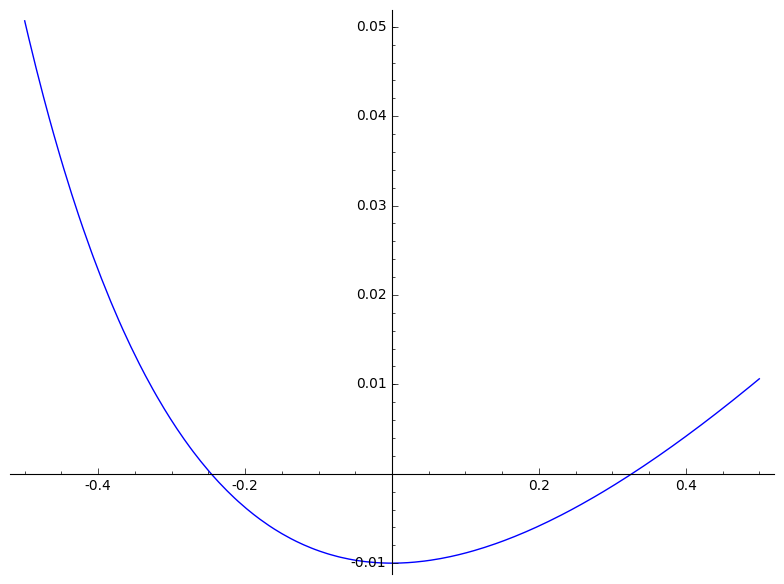

In [45]:
show(plot(beta, (-1/2, 1/2)))

Los puntos de corte de la función beta indican aquellos puntos en los que el error (alfa(x)) se vuelve mayor que 0.01. Por tanto la aproximación  $\beta(x)$ es válida siempre que x pertenezca a (-0.25, 0.325), aproximadamente a partir de la gráfica

### 1)
 Por tanto, es claro que cuando |x|< 0.25 = 1/4 la aproximación es aceptable

### 2)

 La aproximación anterior viene definida por el polinomio de Taylor de grado 1 de la función $\alpha(x)$ en el punto 0. Si aumentamos el grado del polinomio obtendremos una mayor precisión de aproximación. Llamemos al polinomio de Taylor de $\alpha(x)$ en 0 de grado 2 $\beta1(x)$

In [47]:
var ('x')
taylor(sqrt(x+1), x, 0, 2)

-1/8*x^2 + 1/2*x + 1

In [48]:
def alfa2(x):
    return abs(sqrt(1+x)-(1+x/2 -(x**2)/8))/(sqrt(1+x))

In [49]:
def beta2(x):
    return alfa2(x)-0.01

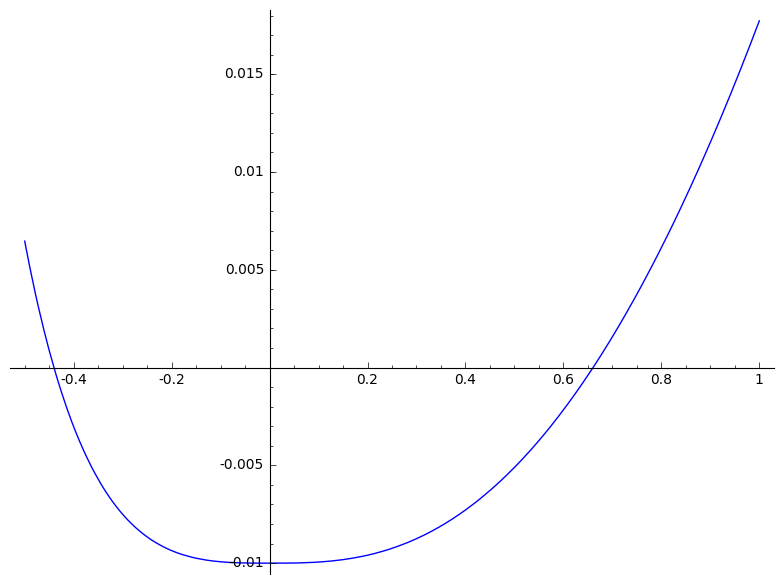

In [52]:
show(plot(beta2, (-1/2, 1)))

Como se puede apreciar en la gráfica el intervalo con precisión menor que 0.01 ha variado de |x|< 0,25 a |x| < 0,45. Por tanto hemos casi duplicado la precisión. Nótese que la aproximación sigue siendo cierta solo en torno al 0 porque el polinomio de Taylor es un método de aproximación local.

## Ejercicio 2

(3 puntos) John Napier publicó su invención de los logaritmos en 1614, mucho antes de la invención del cálculo diferencial. El punto esencial para que los logaritmos fueran útiles era la existencia de *tablas de logaritmos* en las que uno encontraba los logaritmos de los factores, que sumaba a mano, y volvía a usar para encontrar el número cuyo logaritmo era la suma obtenida, es decir,  el producto de los números de partida. 
Henry Briggs colaboró con Napier para producir las primeras tablas de logaritmos mediante el siguiente procedimiento:

1) Queremos calcular el logaritmo de un entero $n>1$. Calculamos $n^{1/2^k}$ para $k=1,2,3,\dots$ hasta que el resultado difiera *muy poco* de $1$. Esto es lo mismo que iterar la extracción de raíces cuadradas hasta llegar casi a $1$. Escribimos 
$$n^{1/2^k}=1+x.$$

2) Ahora tomamos logaritmos para obtener 
$$log(n)=2^klog(1+x).$$

3) Finalmente, Briggs observó que para $x$ suficientemente pequeño en valor absoluto, podía sustituir $log(1+x)$ por $x$, y quedaba $log(n)$ aproximadamente igual a  $2^kx.$ 

Es claro que lo que necesitamos es saber *cómo de pequeño tiene que ser $x$ para obtener un número prefijado $k$ de cifras decimales exactas del logaritmo de $n$.*

A) Define una función $buscar(n,k,precis)$ que debe efectuar el procedimiento de Briggs hasta que la estimación obtenida tenga el número $k$ de cifras correctas de $log(n)$, y en ese momento debe devolver $x$. La precisión arbitraria en los cálculos, determinada por el parámetro *precis* hace falta porque sin ella un cierto bucle $while$ puede hacerse infinito cuando $n$ o $k$ son *grandes*. 

B) Experimenta con la función del primer apartado y, como consecuencia,  enuncia y comprueba la regla que indica cómo de pequeño tiene que ser $x$ para obtener $k$ cifras correctas del logaritmo de $n$.

In [337]:
def buscar(n,k,precis): ##La función va calculando x y aprox de forma iterativa hasta que consigue una aproximación
                        ##de la precisión deseada
    if(4*k>precis):
        return 'Error en argumentos'
    R = RealField(prec = precis)
    real_value=R(log(n))
    i=1
    aprox = 0
    while 1:
        x = pow(n, 1/pow(2, i))-1
        aprox = pow(2, i)**log(x)
        if(abs(real_value - aprox)<10**(-k)):
            return (aprox, i, x)
        i+=1
        

In [338]:
def findlog(n, k, precis):
    R = RealField(prec = precis)
    j=1
    aprox = 0
    while 1:
        if(j>k):
            return aprox, x
        x = pow(n, 1/(pow(2, j)))-1
        aprox = pow(2, j)**log(1+x)
        j+=1

In [341]:
(a,b)=findlog(10, 100, 53)
print a
print ((log(2)-a)/log(2)).N(prec=27)

1267650600228229401496703205376^log(10^(1/1267650600228229401496703205376))
-0.4426950


En esta celda superior podemos ver como la mejor aproximación que se consigue incluso iterando numerosas veces es de un error absoluto de 0.44, lo cual es terrible. La razón la desconozco, pero con lo parece ser el algoritmo adecuadamente implementado las aproximaciones sucesivas no aumentan la precisión y por tanto la función buscar no funciona.

In [261]:
time buscar(10, 2, 27)

KeyboardInterrupt: 

## Ejercicio 3

(4 puntos) El método BBP que permite calcular una cifra determinada de $\pi$, la $n$-ésima, sin calcular las anteriores se puede aplicar a algunas otras constantes. Por ejemplo, para $log(2)$ se puede usar la serie
$$log(2)=\sum_{k=1}^{\infty}\frac{1}{2^kk}.$$

1) En la primera celda se reproduce el código BPP para $\pi$, y lo primero que debes hacer es modificarlo para que funcione para $log(2)$ mediante la serie indicada. La última función, la que devuelve cifras binarias de $log(2)$, debe llamarse $cifra\_log2(n)$. 

2) Modifica el código del apartado 1) para haga todos los cálculos con una precisión (en bits) arbitraria, es decir, la nueva función debe llamarse $cifra\_log2(n,precis)$.

3) Define una función $compara(C1,C2)$ que, dadas dos cadenas de caracteres,  cuente, hasta la primera discrepancia,  el número de caracteres de $C1$ que ocupan el mismo lugar en $C2$. Es decir, si el primer caracter es diferente debe devolver cero, si el primero es igual pero el segundo es diferente debe devolver uno, etc.

4) Jugando con la función  $cifra\_log2(n,precis)$ se observa que cuanto mayor es la precisión más cifras correctas de $log(2)$, a partir de la $n$-ésima,  devuelve, y que fijada la precisión el número de cifras correctas no depende mucho de $n$ y es del orden de la precisión. 
La parte final del ejercicio consiste en comprobar sistemáticamente  estas afirmaciones, para lo que debemos comparar  cadenas $C1$ generadas por $cifra\_log2(n,precis)$ con la parte relevante de  cadenas $C2$  $$(log(2).n(prec=precis)).str(base=2,no\_sci=2)$$
que nos dan las cifras correctas de $log(2).$ El parámetro $no\_sci=2$ sirve para que no se devuelva el resultado en notación científica estándar (i.e. parte entera de un único dígito, decimales,  y exponente de una potencia de $10$).



In [125]:
def F0(j,n):
    S =RR(0.0)
    k =0 
    while k <= n:
        r = 8*k+j
        S += RR(power_mod(16,n-k,r)/r)-floor(RR(power_mod(16,n-k,r)/r))
        k += 1
    return RR(S)

def F1(j,n):
    S =RR(0.0)
    k =n+1
    while 1:
        r = 8*k+j
        nS = S+ RR(16^(n-k)/r)
        if S == nS:
            break
        else:
            S = nS
        k += 1
    return RR(S)

def S(j,n):
    return RR(F0(j,n)+F1(j,n))

def cifra_pi(n):
    n -= 1
    x = (4*RR(S(1,n))-2*RR(S(4,n))-RR(S(5,n))-RR(S(6,n)))
    return (x-floor(x)).str(base=16,no_sci=2)

In [131]:
cifra_pi(3)

'0.3f6a8885a308d0'

In [213]:
def F0_2(j,n):
    S =RR(0.0)
    k =1
    while k <= n:
        r = k
        S += RR(power_mod(2,n-k,r)/r)-floor(RR(power_mod(2,n-k,r)/r))
        k += 1
    return RR(S)

def F1_2(j,n):
    S =RR(0.0)
    k =n+1
    while 1:
        r = k
        nS = S+ RR(2^(n-k)/r)
        if S == nS:
            break
        else:
            S = nS
        k += 1
    return RR(S)

def S_2(j,n):
    return RR(F0_2(j,n)+F1_2(j,n))

def cifra_log2(n):
    n -= 1
    x = RR(S_2(1,n))
    return (x-floor(x)).str(base=2,no_sci=2)
    

In [214]:
L = cifra_log2(20)
print L

0.10111111101111101000111001111011110011010101111000000


In [215]:
def F0_2(j,n, precis):
    R = RealField(prec = precis)
    S =R(0.0)
    k =1
    while k <= n:
        r = k
        S += R(power_mod(2,n-k,r)/r)-floor(R(power_mod(2,n-k,r)/r))
        k += 1
    return R(S)

def F1_2(j,n, precis):
    R = RealField(prec = precis)
    S =R(0.0)
    k =n+1
    while 1:
        r = k
        nS = S+ R(2^(n-k)/r)
        if S == nS:
            break
        else:
            S = nS
        k += 1
    return R(S)

def S_2(j,n, precis):
    R = RealField(prec = precis)
    return R(F0_2(j,n, precis)+F1_2(j,n, precis))

def cifra_log2(n, precis):
    n -= 1
    R = RealField(prec = precis)
    x = R(S_2(1,n, precis))
    return (x-floor(x)).str(base=2,no_sci=2)

In [216]:
R = cifra_log2(20, 106)
print R

0.1011111110111110100011100111101111001101010111100100111100011101100111001100000000011111100101111011011000


In [228]:
def compara(C1, C2): ##Cuenta solo las posiciones decimales después del punto
    L = list(C1)
    R = list(C2)
    count = 0
    lent = min(len(L), len(R))
    for i in range(2, lent):
        if(L[i]!=R[i]):
            return count
        count+=1
    return count

In [231]:
print compara(L, R)

49


In [232]:
print L
print R

0.10111111101111101000111001111011110011010101111000000
0.1011111110111110100011100111101111001101010111100100111100011101100111001100000000011111100101111011011000


In [301]:
def comprobar_n(n, max_precis):
    H = []
    i=4
    while 1:
        if(i>=max_precis):
            return H
        L = cifra_log2(n, i)
        R = list(log(2).n(prec=i).str(base=2, no_sci=2))
        H.append((i, compara(L, R)))
        i+=4
    return H
        

In [302]:
A = comprobar_n(1, 106)

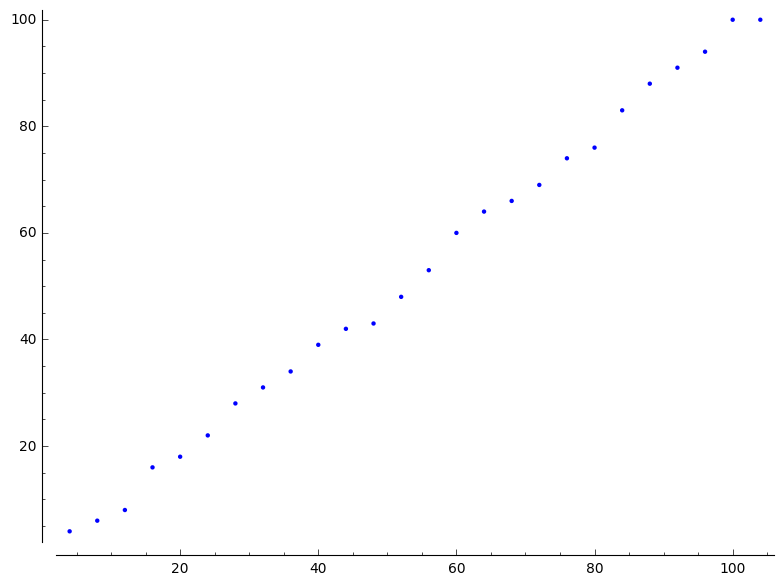

In [303]:
show(points(A))

Como esperábamos las cifras correctas dependen más o menos linealmente y con pendiente 1 de la precisión cuando se fija n y se varía la precisión